<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/Informe_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe BucketSort

## 1. Problema de ordenamiento

Este tipo de problemas se caracterizan por tener un conjunto de datos
desordenados, pero si uno necesita utilizar o analizar estos datos puede 
resultar complejo por el propio hecho de que el conjunto no tenga 
un orden lógico, por lo que uno requerirá resolver este problema.

Hay varias soluciones para ordenar un conjunto de datos, estas soluciones se 
llaman algoritmos de ordenamiento.

Un algoritmo de ordenamiento es un algoritmo que recibe un conjunto desordenado de datos y retorna un conjunto de datos con una relación de orden, donde el resultado de salida ha de ser un reordenamiento del conjunto de entrada que satisfaga una relación de orden.

**Descripción del problema.**

* Un conjunto n de datos: $a_2 , a_5 , a_3 , a_{n-1} , a_0$

* Aplicando el algoritmo de ordenamiento

* Se debería obtener el mismo conjunto pero con un orden lógico: $a_0 \leq a_2 \leq a_3 \leq a_5 \leq a_{n-1}$

### 1.1. Estabilidad de un algoritmo de ordenamiento

Se dice que un **algoritmo de ordenación es estable**, cuando para cualquier
conjunto de datos entrante siempre terminaran en el mismo orden cuando retorne del algoritmo.

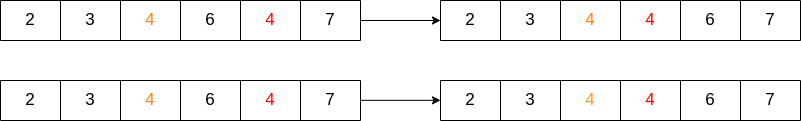

Los **algoritmos de ordenacion inestables** pueden cambiar el orden relativo de un conjunto con datos iguales.

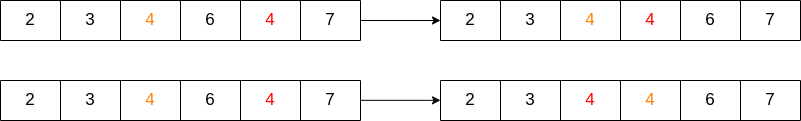

## 2. BucketSort

### 2.1. Descripción del algoritmo

Como el CountingSort, BucketSort es rápido porque asuma una cualidad sobre el
conjunto de entrada. Este algoritmo asume que el conjunto de entrada es generado de manera aleatoria
y distribuido de manera uniforme e independiente sobre un intervalo $[0,1[$ .

BucketSort divide el intervalo $[0,1[$ en **n** sub intervalos de mismo tamaño o también llamados **buckets**, para después distribuir **n** elementos del conjunto de entrada dentro de los **buckets**.

Para la salida de este algoritmo ordenaremos los números en cada **bucket**,
después recorrer los **bucket** en orden e ir agregando cada elemento del conjunto.

Para este algoritmo hay que tener en cuenta que el codigo usado asumira siguiente:

* El conjunto de entrada debe satisfacer esta propiedad para cada dato.

$$ 0 \leq arreglo[i] < 1$$

* Se usa un conjunto auxiliar $B[0,.....,n-1]$ que son los **bucket** y se
  asume que hay una función que las ordena.

<br/>
 
Codigo en Java:

```
import java.util.*;

//Recibe como argumento el arreglo y su tamaño
static void bucketSort(float arr[], int size){

        //Si entra un tamaño no correspondiente se retorna    
        if (size <= 0)return;
            
        ArrayList<Float>[] buckets = new ArrayList[size];
        for (int i = 0; i < size; i++) {
            buckets[i] = new ArrayList<>();
        }
  
        for (int i = 0; i < size; i++) {
            float idx = arr[i] * size;
            buckets[(int)idx].add(arr[i]);
        }
  
        for (int i = 0; i < size; i++) {
            Collections.sort(buckets[i]);
        }
  
        int index = 0;
        for (int i = 0; i < size; i++) {
            for (int j = 0; j < buckets[i].size(); j++) {
                arr[index++] = buckets[i].get(j);
            }
        }
}
```

Observado el codigo se puede ver este orden:


1.  Se crea un arreglo auxiliar llamado buckets
```
ArrayList<Float>[] buckets = new ArrayList[size];
```

2.  A cada posicion del **buckets**$[ i ]$ se crea otro arreglo
```  
for (int i = 0; i < size; i++) {
    buckets[i] = new ArrayList<>();
}
```

3. Recorre el arreglo y esta se va añadiendo al bucket correspondiente
```
for (int i = 0; i < size; i++) {
    float idx = arr[i] * size;
    buckets[(int)idx].add(arr[i]);
}
```

4. Ordenar cada bucket
```
for (int i = 0; i < size; i++) {
    Collections.sort(buckets[i]);
}
```

5. Recorre **buckets**$[i][j]$ en orden y se va añadiendo al arreglo de entrada
```
int index = 0;
for (int i = 0; i < size; i++) {
     for (int j = 0; j < buckets[i].size(); j++) {
         arr[index++] = buckets[i].get(j);
     }
}
```

### 2.2 Paso a paso del algoritmo

Tenemos el siguiente arreglo:

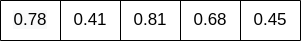


**Primero** debemos hacer un arreglo auxiliar llamado buckets con el mismo tamaño que el arreglo de entrada que en este caso es 5 y a ese arreglo de buckets en cada posición debemos crear otro arreglo para almacenar los datos del arreglo de entrada.

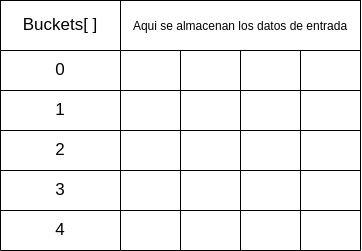

**Segundo** para saber en qué lugar iría cada elemento del arreglo de entrada, primero hay que encontrar la posición y luego almacenar en la posición entera del bucket el elemento del arreglo de entrada.

$$posición = número * tamaño$$
$$buckets[posición] = número$$

Si tenemos el primer número 0.78

$$posición = 0.78 * 5 = 3.9$$
$$buckets[3] = 0.78$$

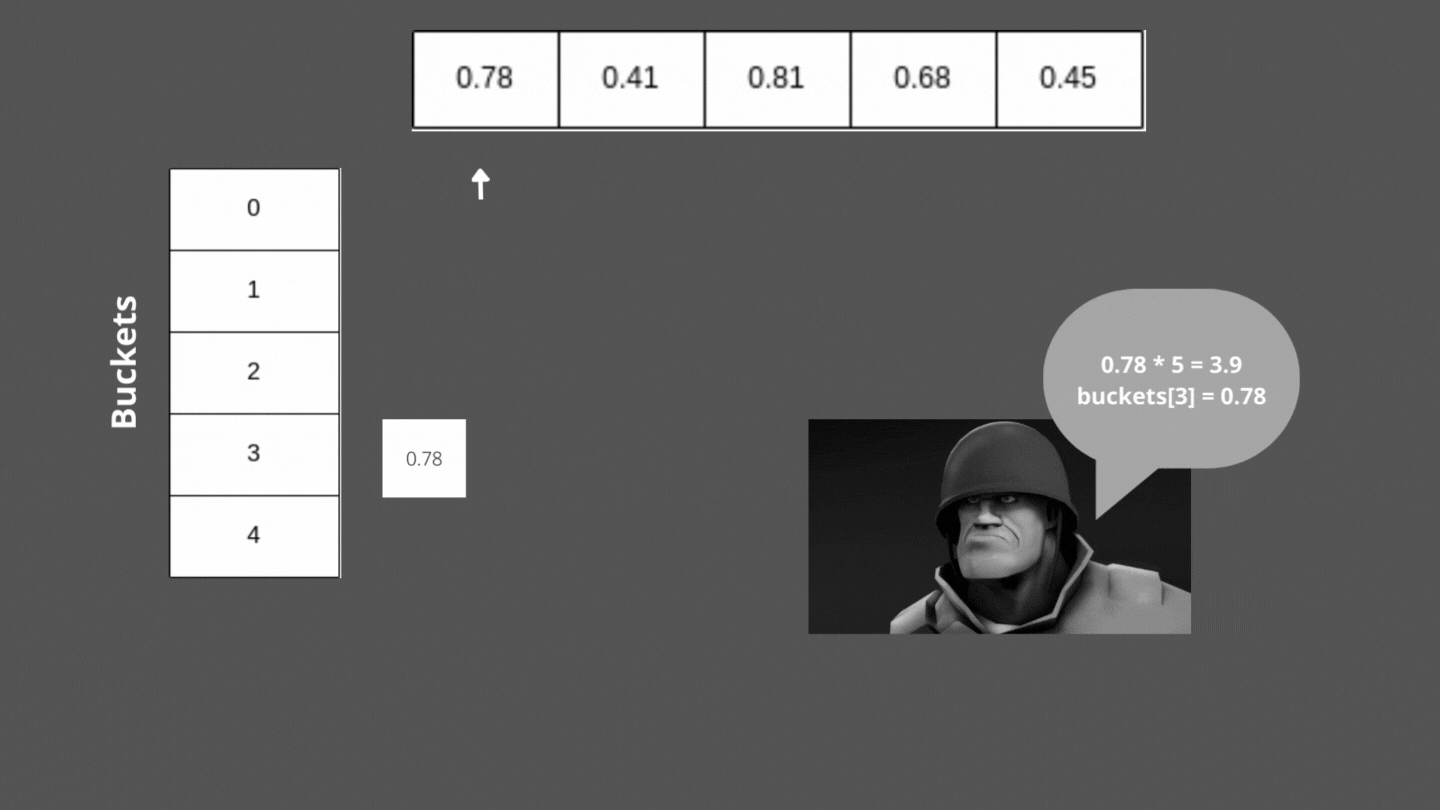

**Despues** ordenaremos cada bucket con un algoritmo de ordenamiento (InsertionSort, MergeSort, etc).

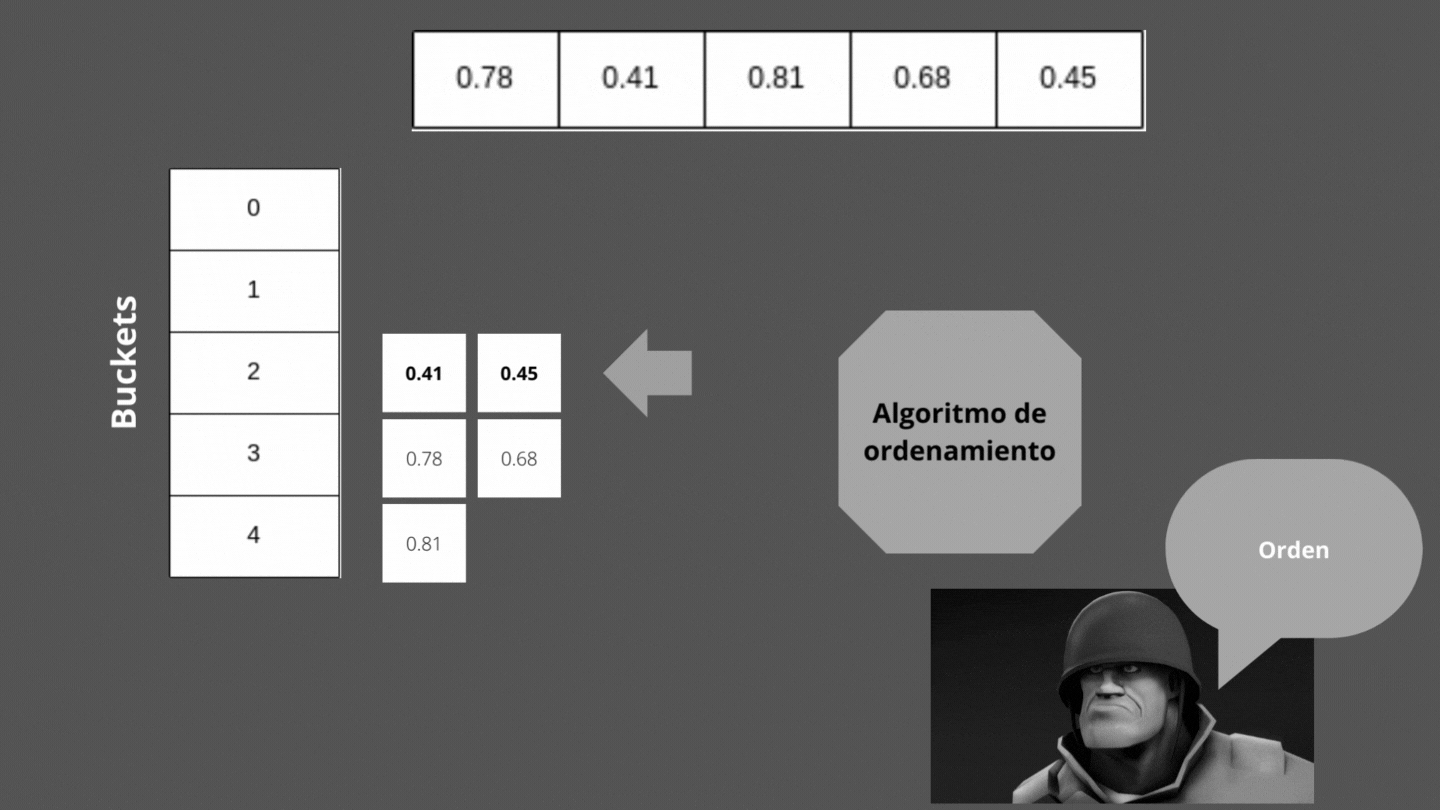

**Finalmente** enlazamos los valores de los buckets por orden al arreglo de entrada.

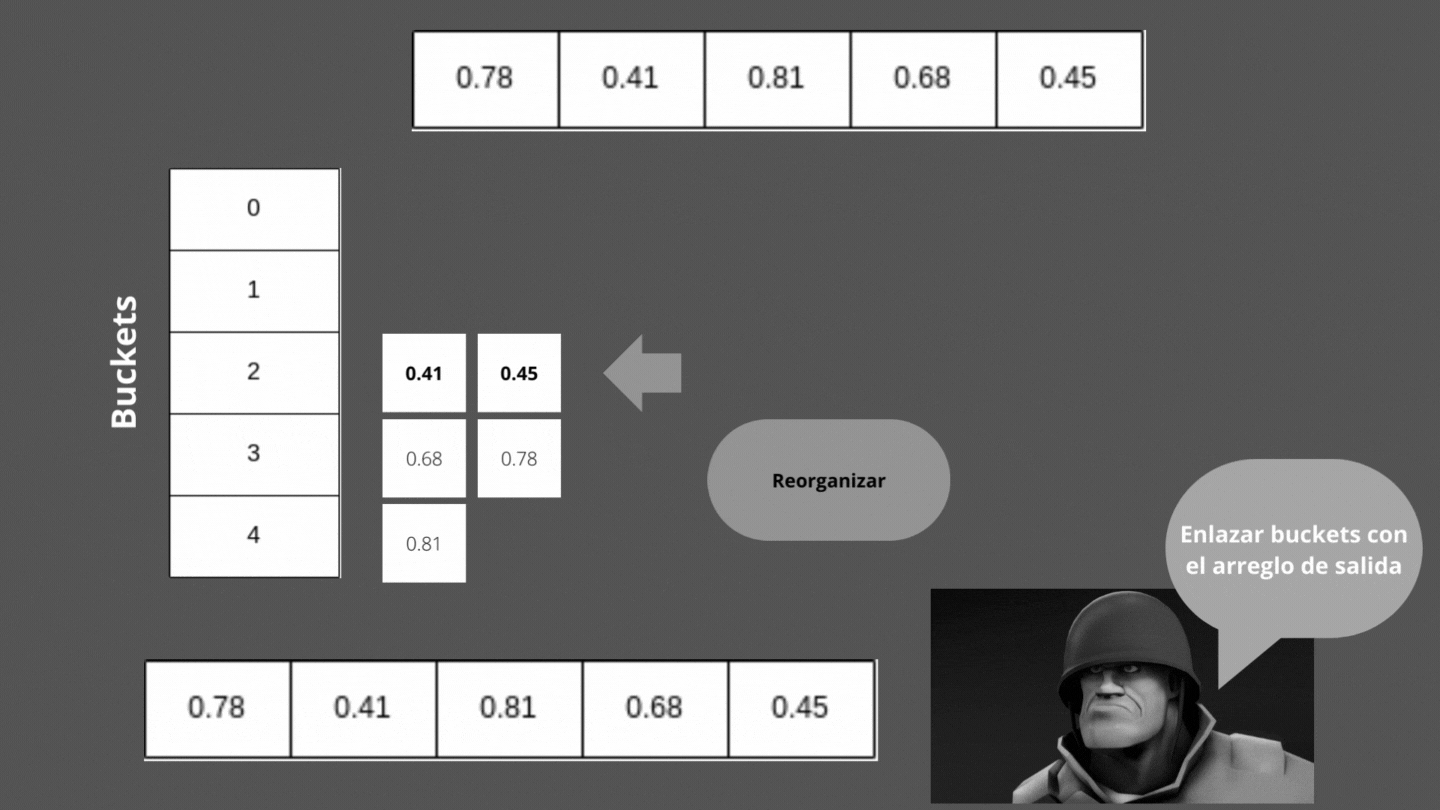

Al finalizar el algoritmo obtenemos el arreglo ordenado.

### 2.3. Implementación en Python

Implementación del BucketSort en Python, se utilizará para ordenar los buckets InsertionSort algoritmo ya explicado anteriormente.

In [48]:
from termcolor import colored

#Algoritmo ya explicado anteriormente
def insertionSort_(arr):
    for i in range(1, len(arr)):
        up = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > up:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = up	
    return arr	

#BucketSort recibe solo el arreglo			
def bucketSort(arr, verbose = False):

    if verbose == True:
        print("========= Inicio del algoritmo =========")
        print("Arreglo de entrada :", str(arr))

    #Crea buckets siempre de tamaño 10
    bucket = []
    slot_num = 10
    for i in range(slot_num):
        bucket.append([])
    
    if verbose == True:
        print("\n========= Se crea un arreglo auxiliar llamadoo buckets =========")
        print("buckets :", str(bucket))
        
    #Añade los valores del arreglo a los buckets
    if verbose == True:
        print("\n========= Añade los valores del arreglo a los buckets =========")
    for j in arr:
        index_b = int(slot_num * j)
        bucket[index_b].append(j)
        if verbose == True:
            print("\nposicion = ",slot_num," * ",j, "=", slot_num * j)
            print("bucket[",index_b,"] = ", j)

    if verbose == True:
        print("\n========= bucket rellenado con los valores =========\n")
        for i in range(0,slot_num):
            print("bucket[",i,"] :", str(bucket[i]),"\n")

        print("\n========= Ordena cada bucket =========")		
    
    #Ordena cada bucket
    for i in range(slot_num):
        if verbose == True:
            print("\nbucket[",i,"] :", str(bucket[i]),"\n")
        bucket[i] = insertionSort_(bucket[i])

        if verbose == True:
            print(colored(f"Despues de utilizar Insertion Sort","blue"),"\n")
            print("bucket[",i,"] :", str(bucket[i]),"\n")
        
    #Enlaza los valores del bucket dentro del arreglo
    k = 0
    if verbose == True:
        print("\n========= Enlaza los valores del bucket dentro del arreglo =========")
    for i in range(slot_num):
        for j in range(len(bucket[i])):
            
            arr[k] = bucket[i][j]
            if verbose == True:
                print("\nbucket[",i,"][",k,"] = ",colored(f"{bucket[i][j]}","blue"), ", sera el arreglo[",k,"]\n")
                if k == len(arr) - 1 or k == 0:
                    print("Arreglo de entrada :[", colored(f"{str(array[:k])[1:-1]}", "red"),colored(f"{str(array[k:k+1])[1:-1]}", "blue") ,str(array[k+1:])[1:-1],"]\n")
                else:
                    print("Arreglo de entrada :[", colored(f"{str(array[:k])[1:-1]}", "red"),",",colored(f"{str(array[k:k+1])[1:-1]}", "blue") ,str(array[k+1:])[1:-1],"]\n")    
                
            k += 1

    #Retorna el arreglo ordenado
    if verbose == True:
        print("\nSe retorna el arreglo ordenado")
        print("\n========= Fin del algoritmo =========")		
    return arr

# Ejemplo
x = [0.897, 0.565, 0.656,
	0.1234, 0.665, 0.3434]
	
print("\nArreglo ordenado :", bucketSort(x)) 


Arreglo ordenado : [0.1234, 0.3434, 0.565, 0.656, 0.665, 0.897]


### 2.4. Paso a paso de la implementacion

In [49]:
array = [0.12,0.39,0.90,0.78,0.65,0.95,0.41,0.59,0.67,0.81,0.15,0.35,0.62]
    
print("\nArreglo ordenado :", bucketSort(array, verbose = True))

========= Inicio del algoritmo =========
Arreglo de entrada : [0.12, 0.39, 0.9, 0.78, 0.65, 0.95, 0.41, 0.59, 0.67, 0.81, 0.15, 0.35, 0.62]

========= Se crea un arreglo auxiliar llamadoo buckets =========
buckets : [[], [], [], [], [], [], [], [], [], []]

========= Añade los valores del arreglo a los buckets =========

posicion =  10  *  0.12 = 1.2
bucket[ 1 ] =  0.12

posicion =  10  *  0.39 = 3.9000000000000004
bucket[ 3 ] =  0.39

posicion =  10  *  0.9 = 9.0
bucket[ 9 ] =  0.9

posicion =  10  *  0.78 = 7.800000000000001
bucket[ 7 ] =  0.78

posicion =  10  *  0.65 = 6.5
bucket[ 6 ] =  0.65

posicion =  10  *  0.95 = 9.5
bucket[ 9 ] =  0.95

posicion =  10  *  0.41 = 4.1
bucket[ 4 ] =  0.41

posicion =  10  *  0.59 = 5.8999999999999995
bucket[ 5 ] =  0.59

posicion =  10  *  0.67 = 6.7
bucket[ 6 ] =  0.67

posicion =  10  *  0.81 = 8.100000000000001
bucket[ 8 ] =  0.81

posicion =  10  *  0.15 = 1.5
bucket[ 1 ] =  0.15

posicion =  10  *  0.35 = 3.5
bucket[ 3 ] =  0.35

posicion 

## 3. Tiempo de ejecución

Para el tiempo de ejecución de este algoritmo hay que tener en cuenta que contiene 2 complejidades, la del bucketSort y la espacial, siendo esta espacial el arreglo bucket que se crea para ordenar el arreglo de entrada:

### 3.1. Complejidad espacial del BucketSort

La complejidad espacial es de $O(n + k)$, donde $n$ es la cantidad de datos del arreglo de entrada y $k$ el número de buckets creados, donde cada bucket tiene complejidad $O(k)$ y cada bucket tiene $n$ elementos dentro, demostrando porque la complejidad espacial es $O(n + k)$.

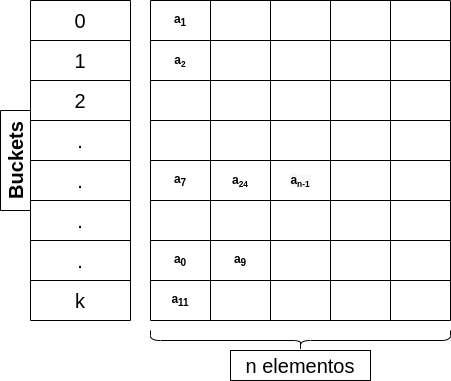

### 3.2. Complejidad del BucketSort

**Mejor caso**

Si el arreglo de entrada **están uniformemente distribuidas**, el tamaño de cada bucket será relativamente parecido al resto de buckets, haciendo que el ordenamiento para cada bucket sea parejo y reduciendo de mejor manera el que un solo bucket arregle la mayoría de elementos. 

Por lo que crear $n$ buckets y agregar los valores del arreglo tiene complejidad $O(n)$ por otra parte si usamos InsertionSort para ordenar los elementos de cada bucket obtenemos una complejidad $O(k)$, por lo tanto, el **mejor caso** para el BucketSort es de $Ω(n+k)$, donde $n$ es el número de elementos del arreglo de entrada y $k$ es el número de buckets.


**Peor caso**

Si el arreglo de entrada **no están uniformemente distribuidas**, los elementos están concatenados con un rango específico. Esto resulta en uno o más buckets teniendo mayor cantidad de elementos que otros buckets, siendo el peor resultado el que uno solo bucket tengas casi todos o todos los elementos del arreglo de entrada, haciendo que literalmente el proceso de separar los elementos en buckets no sirva de nada y teniendo que ordenar de igual manera los $n$ elementos recorriéndolos con InsertionSort y eso se puede sumar que el arreglo pueda venir ordenado de mayor a menor (el peor caso del InsertionSort), por esto el peor caso del BucketSort es de $O(n^2)$

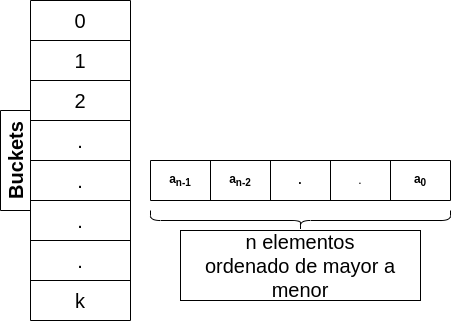

## 4. Correctitud del BucketSort

El BucketSort crea un arreglo auxiliar llamado buckets para almacenar los elementos del arreglo de entrada y utiliza el InsertionSort para ordenar cada bucket, para finalmente enlazar los elementos de cada bucket al arreglo de entrada.

#### Prueba del Teorema

Previamente, observamos que en cada paso del algoritmo va rellenando y ordenando los buckets para despues insertarlo al arreglo de entrada.

Por lo que probaremos la siguiente propiedad invariante de bucle para el BucketSort:


> Cada paso del BucketSort debe ser correcta tanto al inicio como durante la realizacion del paso de acuerdo a la funcion que debe cumplir dentro del algoritmo.

**Pasos a comprobar su correctitud** :

1.

```
#Crea buckets de tamaño 10
    bucket = []
    slot_num = 10
    for i in range(slot_num):
        bucket.append([])
```

2.

```
#Añade los valores del arreglo a los buckets
for j in arr:
        index_b = int(slot_num * j)
        bucket[index_b].append(j)
```

3.

```
#Ordena cada bucket
for i in range(slot_num):
        bucket[i] = insertionSort(bucket[i])
```

4.

```
#Inserta los valores ordenados de cada bucket en el arreglo de entrada
k = 0
for i in range(slot_num):
    for j in range(len(bucket[i])):
        arr[k] = bucket[i][j]    
        k += 1
```

**Iniciación**

1. Al comenzar la iteración se crea el primer **bucket**[  0  ][  ] por lo que 
   el primer paso cumple con su función al principio.

2. Al comenzar la iteración, primero se calcula la posición a la cual el primer 
   valor del arreglo ira para luego añadirlo al **bucket**[    *posicion*   ]
   [    ], cumpliendo el paso dos con
   su función.

3. Al comenzar la iteración, el primer **bucket**[ 0 ][  ] sera ordenada por el
   InsertionSort, algoritmo que en un anterior informe ya vimos que era correcto
   por lo que el tercer paso cumple con su función.

4. Al comenzar la iteración, se coloca los n valores del **bucket**[  0  ]
   [  ] ordenadas previamente dentro del arreglo de entrada. 
   
   Como el **bucket**[ 0 ][  ] contiene los números menores.
 
   Indica que el arreglo de entrada está trivialmente ordenado desde **arreglo** [  0  ] hasta el **arreglo**[  n - 1  ], donde n son los valores contenidos dentro del **bucket**[ 0 ][  ], por lo que el paso cuatro realiza con éxito su función.

   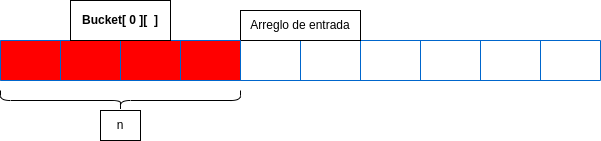

**Mantención**

1. En la i-ésima iteración se crea el **bucket**[   i-ésimo  ][  ] por 
   lo que el primer paso cumple con su función al principio.

2. En la i-ésima iteración, se calcula la posición a la cual el valor i-ésimo 
   del arreglo ira para luego añadirlo al **bucket**[    *posicion*   ][    ], 
   cumpliendo el paso dos con su función.

3. En la i-ésima iteración, el **bucket**[ i-ésimo ][  ] sera ordenada por el
   InsertionSort, algoritmo que en un anterior informe ya vimos que era correcto
   por lo que el tercer paso cumple con su función.

4. En la i-ésima iteración, se coloca los n valores del **bucket**[  i-ésimo  ]
   [  ] ordenadas previamente dentro del arreglo de entrada. 
   
   Como el **bucket**[ i-ésimo ][  ] contiene los números del medio.
 
   Tomando en cuenta los anteriores **buckets** que ya ordenaron trivialmente
   el arreglo de entrada, tenemos que el **arreglo**[  0  ] hasta el **arreglo**
   [  k  ], donde k la posición del arreglo donde se colocó el último valor del **bucket**[ i-ésimo ][  ], por lo que el paso cuatro realiza con éxito su función.

  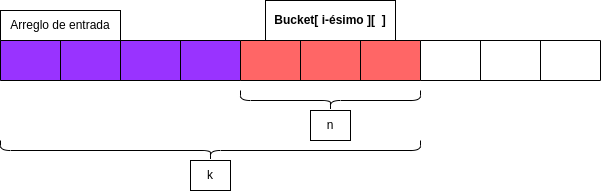

Finalmente, la propiedad de bucle invariante es verdadera en cada iteración, podemos decir que al finalizar la n-ésima iteración en cada paso, cada una cumple con su función y como todos los pasos del BucketSort son correctos por la propiedad invariante de bucle, el algoritmo BucketSort también es correcto.

## 5. Estabilidad del BucketSort

Como habrán leído el algoritmo implementado funciona muy bien con valores entre 0 y 1, eso significa que este algoritmo tiene problemas cuando se añaden valores fuera de ese rango, por ejemplo

```
arreglo = [-10, 10, 9, 4 -1, 1, 1]
arreglo = bucketSort(arreglo)
print(str(arreglo))
```
Al ejecutarlo el algoritmo se cae porque no fue pensado para valores negativos.


```
index_b = int(slot_num * j)
bucket[index_b].append(j)
```

Esta parte es la que se cae debido a que al multiplicar un número negativo por el tamaño de los buckets provoco que la posición fuera negativa, algo que no puede ocurrir porque no hay posiciones negativas dentro de un arreglo.

Incluso si se puede arreglar ese problema colocando un valor absoluto para calcular la posición uno verá que de igual forma falla tanto el modo de calcular la posición o el tamaño del bucket como tal.

BucketSort tiene una ventaja muy grande sobre otro algoritmo más tradicionales porque intenta realizar la menor cantidad de comparaciones posibles y eso lo logra implementando una forma específica para una entrada en específico, pero eso lo vuelve un mal algoritmo para cuando reciba un arreglo muy distinto a la entrada que se desea obtener resultando en que se caiga el algoritmo o que lo ordene a medias. Esto hace que este algoritmo utilizado sea inestable.

## 5. Experimentos

### 5.1. Comparacion con otros algoritmos

Veremos una comparación con otros algoritmos como CountingSort, el RadixSort y por último QuickSort.

#### BucketSort

Para el experimento usaremos números enteros, así que tendremos que usar un algoritmo que sirva para este caso.

In [10]:
def bucketSort2(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
    rnge = (max_ele - min_ele) / noOfBuckets
    temp = []

    for i in range(noOfBuckets):
        temp.append([])

    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)

        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])


    for i in range(len(temp)):
        if len(temp[i]) != 0:
            temp[i].sort()


    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1

#### CountingSort

In [11]:
def count_sort(arr):
	max_element = int(max(arr))
	min_element = int(min(arr))
	range_of_elements = max_element - min_element + 1
	count_arr = [0 for _ in range(range_of_elements)]
	output_arr = [0 for _ in range(len(arr))]

	for i in range(0, len(arr)):
		count_arr[arr[i]-min_element] += 1

	for i in range(1, len(count_arr)):
		count_arr[i] += count_arr[i-1]

	for i in range(len(arr)-1, -1, -1):
		output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
		count_arr[arr[i] - min_element] -= 1

	for i in range(0, len(arr)):
		arr[i] = output_arr[i]

	return arr

#### RadixSort

RadixSort al igual que el BucketSort utiliza otros algoritmos de ordenamiento
para reordenar un arreglo, siempre y cuando el algoritmo de ordenamiento que se use sea estable.

In [12]:
def countingSort(arr, exp1):

	n = len(arr)

	output = [0] * (n)

	count = [0] * (10)

	for i in range(0, n):
		index = arr[i] // exp1
		count[index % 10] += 1

	for i in range(1, 10):
		count[i] += count[i - 1]

	i = n - 1
	while i >= 0:
		index = arr[i] // exp1
		output[count[index % 10] - 1] = arr[i]
		count[index % 10] -= 1
		i -= 1

	i = 0
	for i in range(0, len(arr)):
		arr[i] = output[i]

def radixSort(arr):

	max1 = max(arr)
	exp = 1
	while max1 / exp >= 1:
		countingSort(arr, exp)
		exp *= 10


#### QuickSort

In [14]:
def partition3(array, low, high):
  pivot = array[high]
  
  i = low - 1
  
  for j in range(low, high):
    if array[j] <= pivot:
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
  
  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1


def quick_sort(array, low, high):
    if low < high:
       pi = partition3(array, low, high )
       quick_sort(array, low, pi - 1 )
       quick_sort(array, pi + 1, high)


Para la realización de este experimento se usarán números enteros entre el 0 y el 1999 como también distintos tamaños de arreglo desde 5 hasta 1999.:

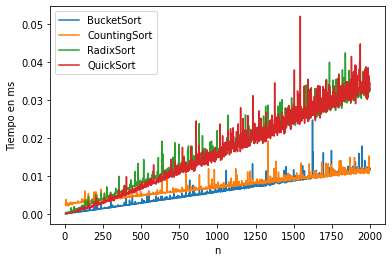

In [22]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_bucket = []
y_counting = []
y_quick = []
y_radix = []

for n in range(5,2000):

  a = random.sample(range(1, 2000), n)
  b = deepcopy(a)
  c = deepcopy(a)
  d = deepcopy(a)

  t_bucket = repeat(setup="from __main__ import bucketSort2", stmt=f"bucketSort2({a},{5})", repeat=1, number=10)
  t_counting = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({b})", repeat=1, number=10)
  t_radix = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({c})", repeat=1, number=10)
  t_quick = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({d},{0},{len(d)-1})", repeat=1, number=10)

  x.append(n)
  y_bucket.append(t_bucket)
  y_counting.append(t_counting)
  y_radix.append(t_radix)
  y_quick.append(t_quick)

plt.plot(x,y_bucket)
plt.plot(x,y_counting)
plt.plot(x,y_radix)
plt.plot(x,y_quick)

plt.legend(["BucketSort", "CountingSort","RadixSort","QuickSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### Análisis del gráfico

Visto el gráfico es fácil ver que de los cuatro el QuickSort y el RadixSort son los que más se demoran un sí la diferencia es muy poca, por otro lado, se ve una paridad entre el CountingSort el BucketSort, pero se ve que si se agranda el tamaño del arreglo eventualmente el BucketSort sobrepasará al CountingSort.

BucketSort va perdiendo efectividad a medida que el arreglo va aumentando de tamaño, esto porque en este caso estamos usando 5 buckets para guardar cada valor. Una solución podría ser aumentar esta cantidad de buckets.

Por lo que veremos ahora si con los mismos parámetros ahí un cambio significativo si es que aumentamos los buckets.

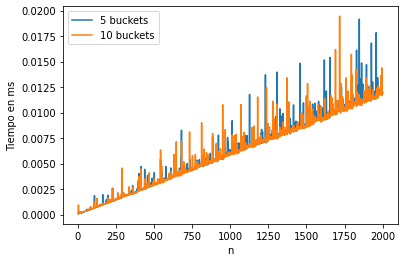

In [26]:
x=[]
y_bucket = []
y_bucket2 = []

for n in range(5,2000):

  a = random.sample(range(1, 2000), n)
  b = deepcopy(a)

  t_bucket = repeat(setup="from __main__ import bucketSort2", stmt=f"bucketSort2({a},{5})", repeat=1, number=10)
  t_bucket2 = repeat(setup="from __main__ import bucketSort2", stmt=f"bucketSort2({b},{10})", repeat=1, number=10)

  x.append(n)
  y_bucket.append(t_bucket)
  y_bucket2.append(t_bucket2)

plt.plot(x,y_bucket)
plt.plot(x,y_bucket2)


plt.legend(["5 buckets", "10 buckets"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Por lo visto, aumentando los buckets no mejora su rendimiento de manera notoria.

### 5.2 BucketSort con otros Algoritmos de ordenamiento

Como vimos anteriormente, aumentar los buckets no mejora su rendimiento, pero utilizar otro método de ordenar, ¿podra hacerlo?.

#### MergeSort

In [34]:
def mergeSort(arr):
	if len(arr) > 1:

		mid = len(arr)//2

		L = arr[:mid]
		R = arr[mid:]

		mergeSort(L)
		mergeSort(R)

		i = j = k = 0
		while i < len(L) and j < len(R):
			if L[i] < R[j]:
				arr[k] = L[i]
				i += 1
			else:
				arr[k] = R[j]
				j += 1
			k += 1

		while i < len(L):
			arr[k] = L[i]
			i += 1
			k += 1

		while j < len(R):
			arr[k] = R[j]
			j += 1
			k += 1

def bucketSortMerge(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
    rnge = (max_ele - min_ele) / noOfBuckets
    temp = []

    for i in range(noOfBuckets):
        temp.append([])

    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)

        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])


    for i in range(len(temp)):
        if len(temp[i]) != 0:
            mergeSort(temp[i])


    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1  

#### InsertionSort

In [33]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        up = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > up:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = up	
    return arr

def bucketSortInsertion(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
    rnge = (max_ele - min_ele) / noOfBuckets
    temp = []

    for i in range(noOfBuckets):
        temp.append([])

    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)

        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])


    for i in range(len(temp)):
        if len(temp[i]) != 0:
            temp[i] = insertionSort(temp[i])


    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1

#### HeapSort

In [37]:
def heapify(arr, N, i):
	largest = i 
	l = 2 * i + 1	 
	r = 2 * i + 2

	if l < N and arr[largest] < arr[l]:
		largest = l

	if r < N and arr[largest] < arr[r]:
		largest = r

	if largest != i:
		arr[i], arr[largest] = arr[largest], arr[i]

		heapify(arr, N, largest)

def heapSort(arr):
	N = len(arr)

	for i in range(N//2 - 1, -1, -1):
		heapify(arr, N, i)

	for i in range(N-1, 0, -1):
		arr[i], arr[0] = arr[0], arr[i]
		heapify(arr, i, 0)


def bucketSortHeap(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
    rnge = (max_ele - min_ele) / noOfBuckets
    temp = []

    for i in range(noOfBuckets):
        temp.append([])

    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)

        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])


    for i in range(len(temp)):
        if len(temp[i]) != 0:
            heapSort(temp[i])


    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1

#### QuickSort

In [41]:
def partition(array, low, high):
  pivot = array[high]
  
  i = low - 1
  
  for j in range(low, high):
    if array[j] <= pivot:
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
  
  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1


def quick_sort_(array, low, high):
    if low < high:
       pi = partition(array, low, high )
       quick_sort(array, low, pi - 1 )
       quick_sort(array, pi + 1, high)


def bucketSortQuick(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
    rnge = (max_ele - min_ele) / noOfBuckets
    temp = []

    for i in range(noOfBuckets):
        temp.append([])

    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)

        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])


    for i in range(len(temp)):
        if len(temp[i]) != 0:
            quick_sort_(temp[i], 0, len(temp[i]) - 1)


    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1       

Al igual que en el experimento anterior, ocuparemos los mismos parámetros tanto los valores como en los tamaños de los arreglos.

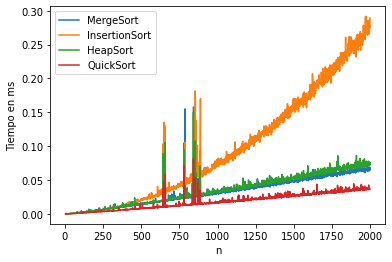

In [38]:
x=[]
y_merge = []
y_insertion = []
y_heap = []
y_quick = []

for n in range(5,2000):

  a = random.sample(range(1, 2000), n)
  b = deepcopy(a)
  c = deepcopy(a)
  d = deepcopy(a)

  t_merge = repeat(setup="from __main__ import bucketSortMerge", stmt=f"bucketSortMerge({a},{5})", repeat=1, number=10)
  t_insertion = repeat(setup="from __main__ import bucketSortInsertion",  stmt=f"bucketSortInsertion({b},{5})", repeat=1, number=10)
  t_heap = repeat(setup="from __main__ import bucketSortHeap",  stmt=f"bucketSortHeap({c},{5})", repeat=1, number=10)
  t_quick = repeat(setup="from __main__ import bucketSortQuick",  stmt=f"bucketSortQuick({d},{5})", repeat=1, number=10)

  x.append(n)
  y_merge.append(t_merge)
  y_insertion.append(t_insertion)
  y_heap.append(t_heap)
  y_quick.append(t_quick)

plt.plot(x,y_merge)
plt.plot(x,y_insertion)
plt.plot(x,y_heap)
plt.plot(x,y_quick)

plt.legend(["MergeSort", "InsertionSort","HeapSort","QuickSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### Análisis del gráfico

Viendo el gráfico se puede observar que si se cambia el algoritmo de ordenamiento que el BucketSort ocupara, afecta en el tiempo de ejecución.

Por otro lado, también se puede observar que en el gráfico, la más rápida es QuickSort que coincide que es la más rápida de las 4 de manera individual, como también la más lenta el InsertionSort que también es la más lenta de los 4 de manera individual.

Por lo que podemos inferir que si queremos mejorar el rendimiento del algoritmo debemos ocupar un algoritmo de ordenamiento estable y que tenga un tiempo de ejecución lo más rápido posible.